In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import itertools
import numpy as np

from rmexp import dbutils, config
from rmexp.schema import models


In [ ]:
prefix = ['plocal'] #, 'pwifi', 'ppoorwifi']
feeds = [1]
fpss = [1, 2]
workers = [10]
cores = [2, 4]
memorys = ["1g"]

choices = [prefix, feeds, fpss, workers, cores, memorys]
for combo in itertools.product(*choices):
    exp_name = '{}f{}fps{}w{}c{}m{}'.format(*combo)
    print("Experiment ({})".format(exp_name))
    latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name==exp_name).all()]
    if len(latencys) == 0:
        continue
    plt.figure(figsize=(8, 4))
    plt.hist(latencys, bins=60);
    plt.ylabel('Count');
    plt.xlabel('latency (ms)');
    plt.title('LegoLatency, {}, {} video streams, {} FPS, {} worker, {} cores, {} mem'.format(*combo))

Experiment (plocalkafkaf1fps1w10c1m1g)


<IPython.core.display.Javascript object>


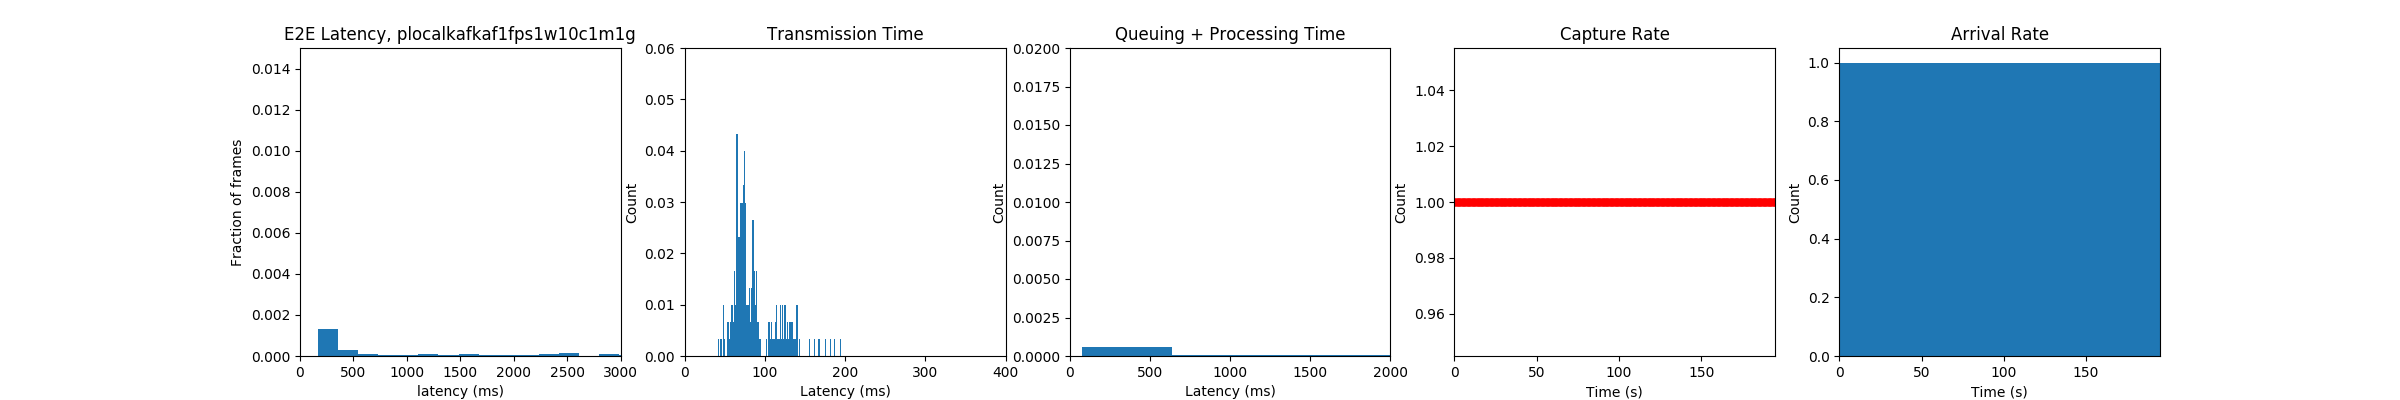

Experiment (plocalkafkaf1fps1w10c4m1g)


<IPython.core.display.Javascript object>


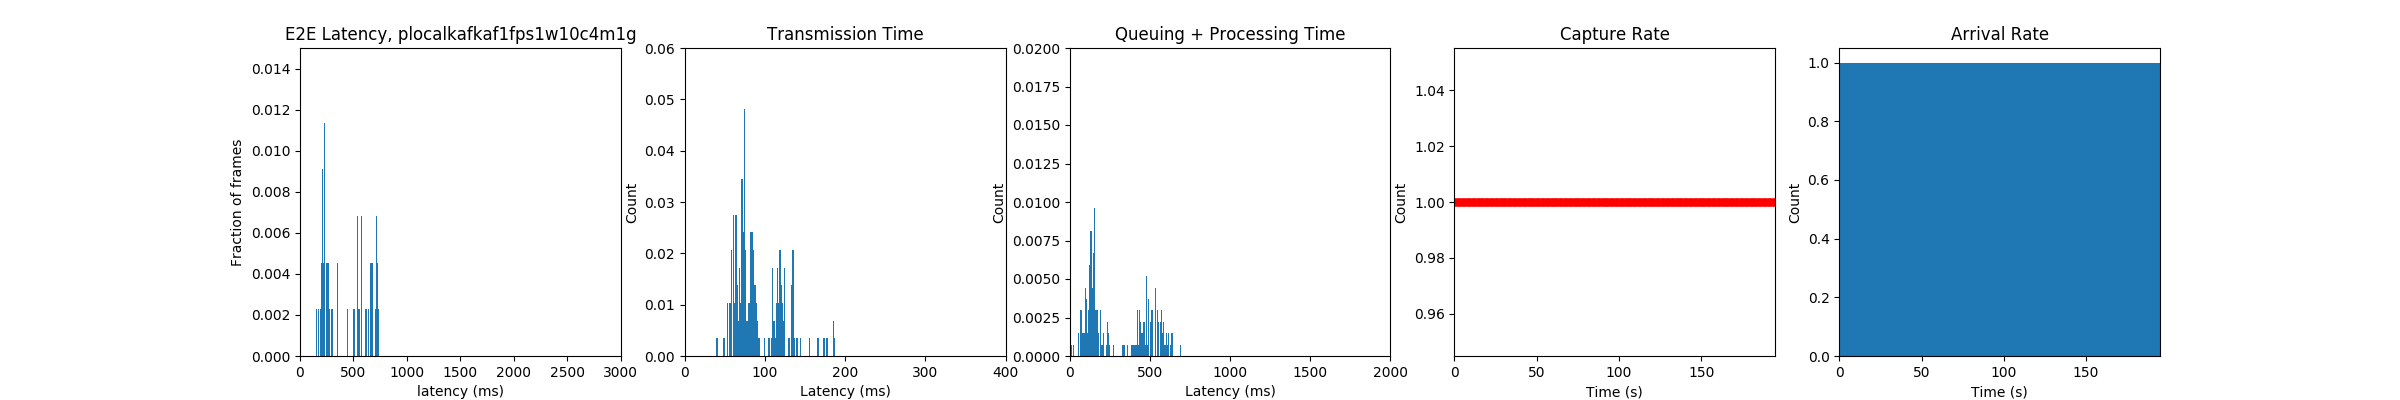

Experiment (plocalkafkaf1fps1w10c8m1g)


<IPython.core.display.Javascript object>


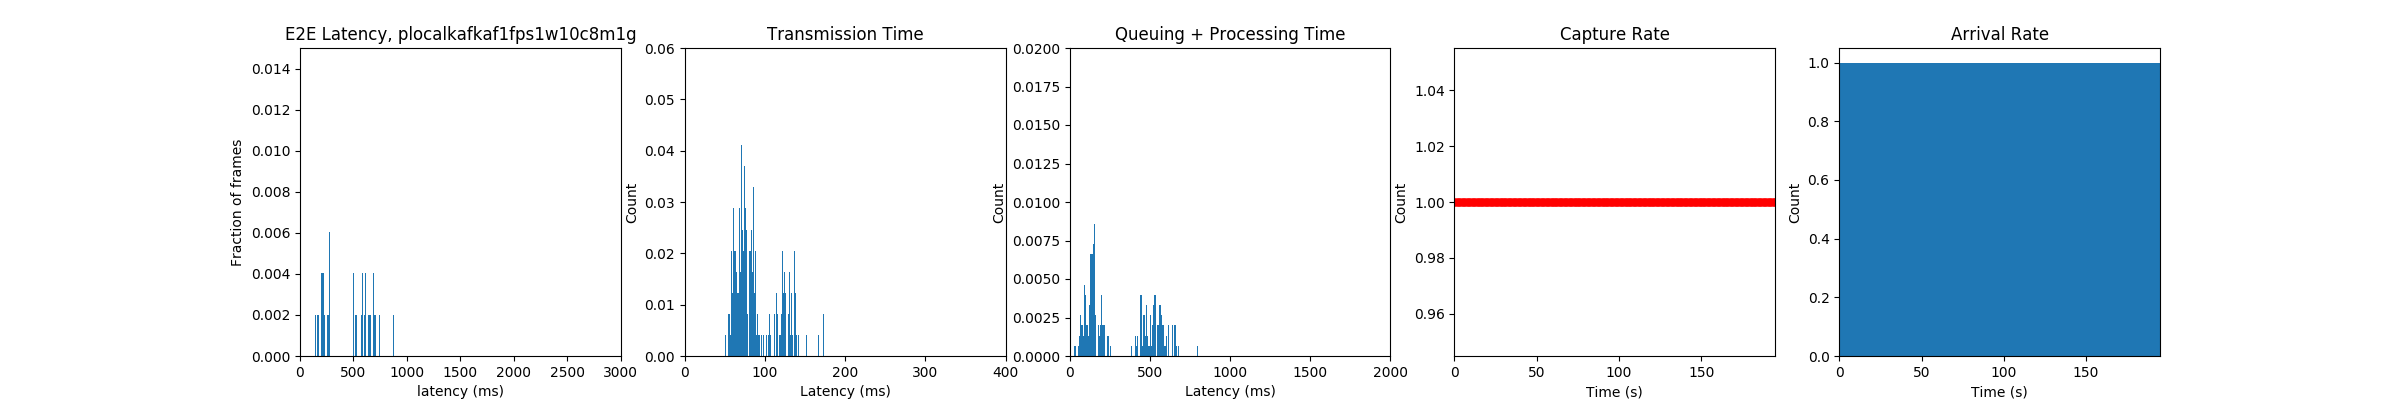

Experiment (plocalkafkaf1fps2w10c1m1g)
Experiment (plocalkafkaf1fps2w10c4m1g)


<IPython.core.display.Javascript object>


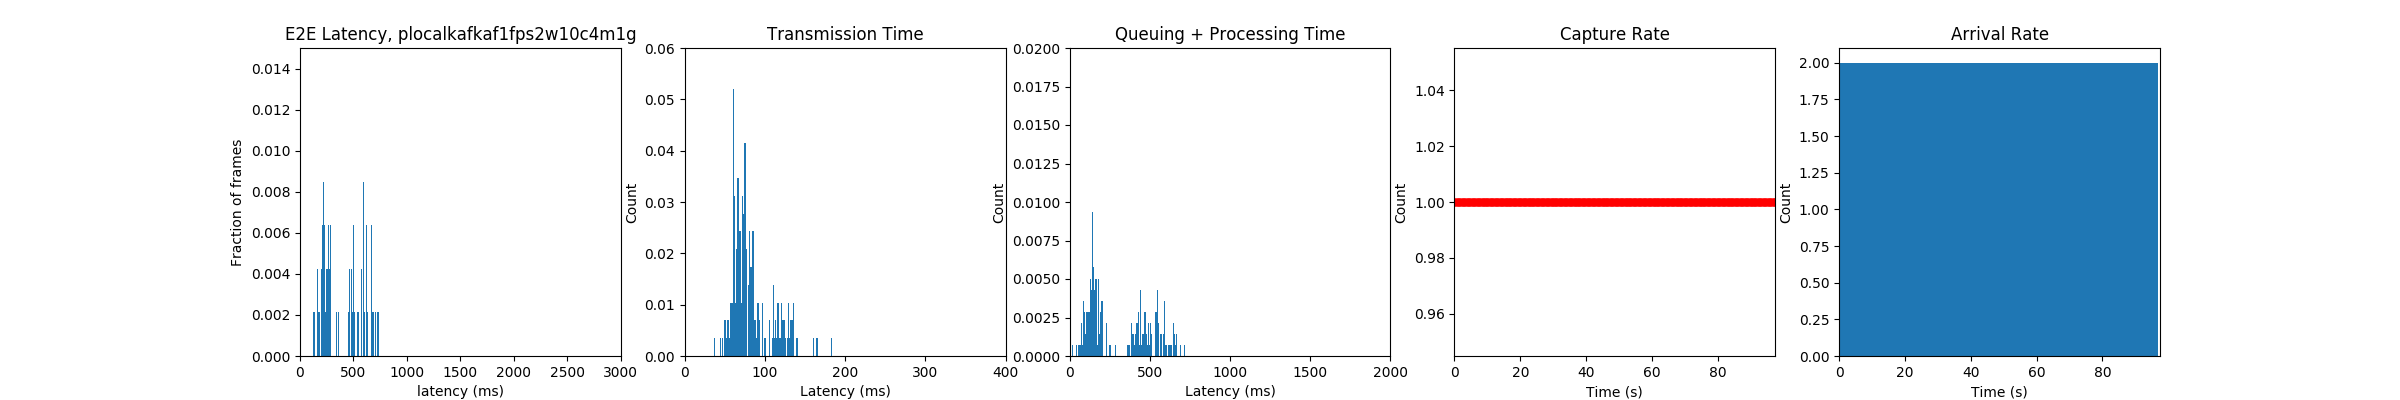

Experiment (plocalkafkaf1fps2w10c8m1g)
Experiment (plocalkafkaf1fps4w10c1m1g)
Experiment (plocalkafkaf1fps4w10c4m1g)


<IPython.core.display.Javascript object>


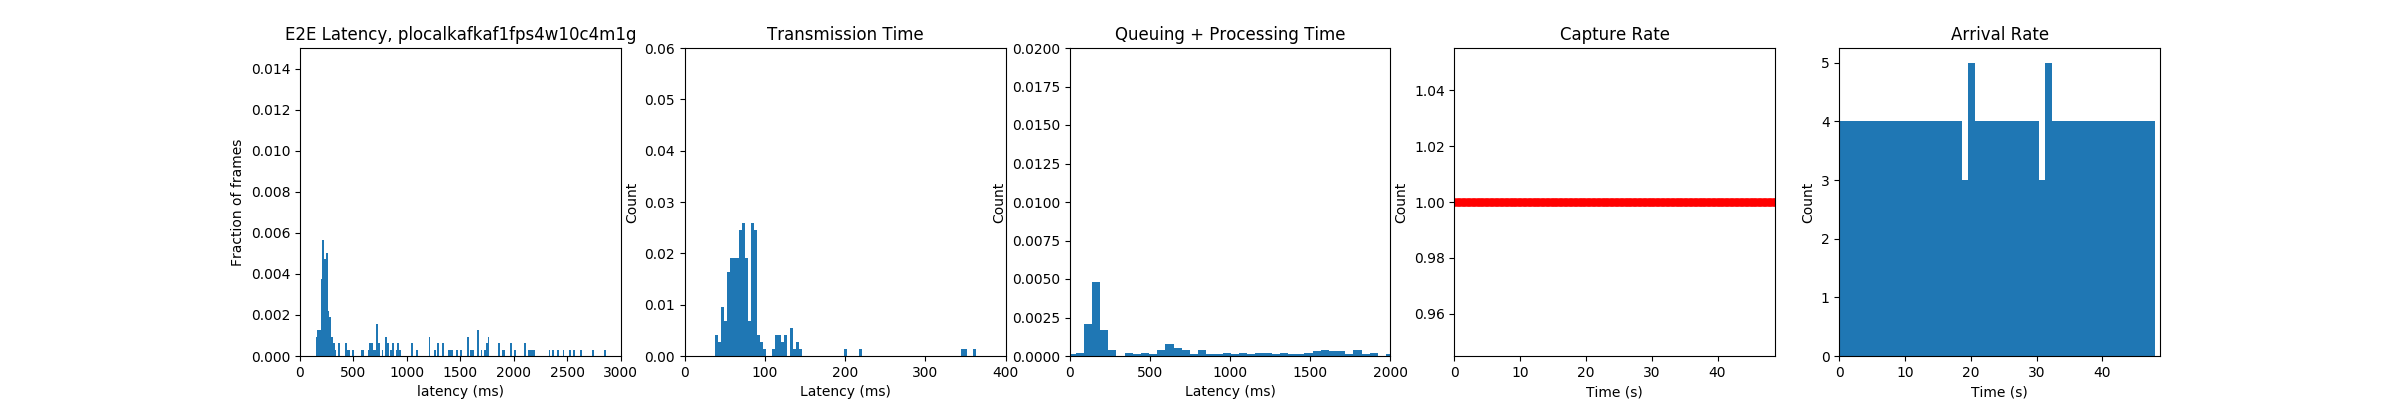

Experiment (plocalkafkaf1fps4w10c8m1g)
Experiment (plocalkafkaf1fps6w10c1m1g)
Experiment (plocalkafkaf1fps6w10c4m1g)


<IPython.core.display.Javascript object>


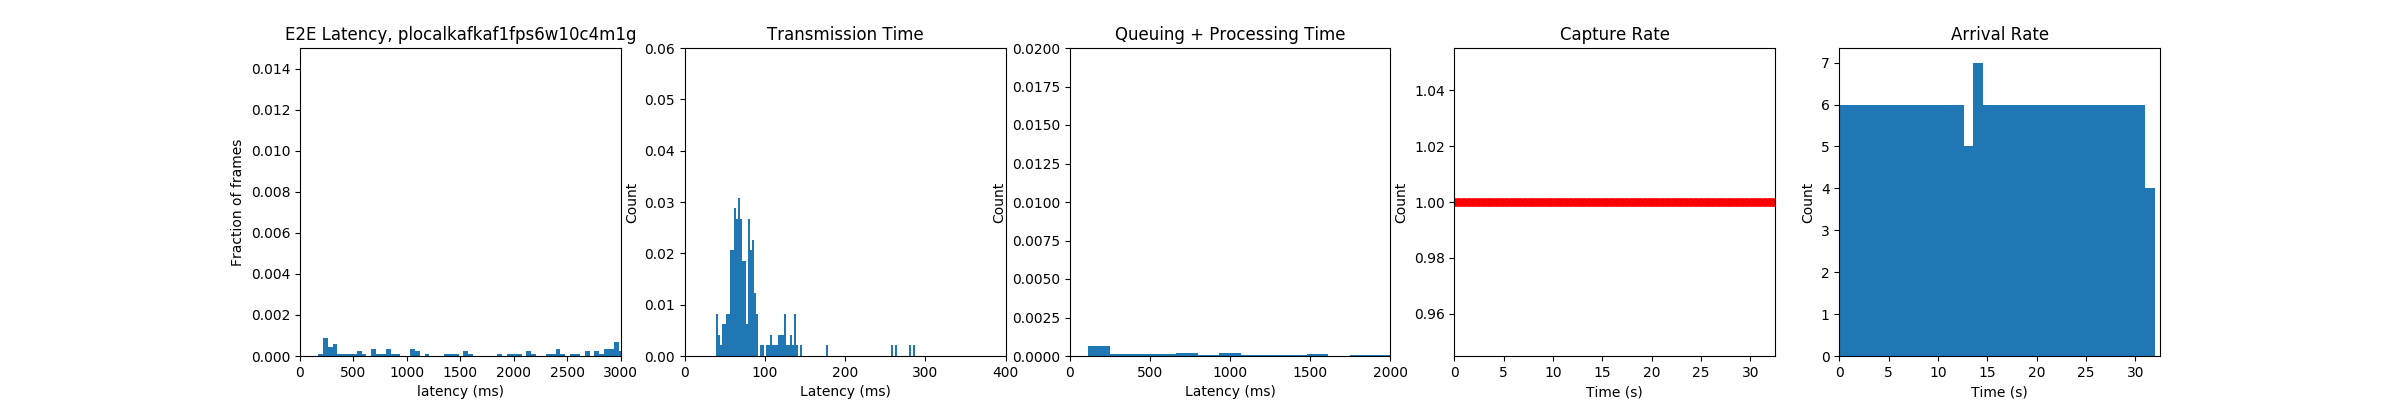

Experiment (plocalkafkaf1fps6w10c8m1g)


In [45]:
%matplotlib notebook

prefix = ['plocalkafka'] #, 'pwifi', 'ppoorwifi']
feeds = [1]
fpss = [1, 2, 4, 6]
workers = [10]
cores = [1, 4, 8]
memorys = ["1g"]
sess = dbutils.get_session()
choices = [prefix, feeds, fpss, workers, cores, memorys]

exp_num = len(list(itertools.product(*choices)))

for combo in itertools.product(*choices):
    exp_name = '{}f{}fps{}w{}c{}m{}'.format(*combo)
    print("Experiment ({})".format(exp_name))
    tss = np.array([(item.capture, item.arrival, item.finished, item.val) for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name==exp_name).all()], dtype=float)
    if tss.shape[0] == 0:
        continue

    plot_h_index = 1

    plt.figure(figsize=(24, 4))
    plt.subplot(1, 5, plot_h_index)
    plt.hist(tss[:,3].tolist(), density=True, bins=300);
    plt.ylabel('Fraction of frames');
    plt.xlabel('latency (ms)');
    plt.ylim([0, 0.015])
    plt.xlim([0, 3000])
    plt.title('E2E Latency, {}'.format(exp_name))
    plot_h_index += 1
    
    plt.subplot(1, 5, plot_h_index)
    plt.hist((tss[:, 1] - tss[:, 0])*1000, density=True, bins=100);
    plt.ylabel('Count');
    plt.xlabel('Latency (ms)');
    plt.ylim([0, 0.06])
    plt.xlim([0, 400])
    plt.title('Transmission Time')
    plot_h_index += 1
    
    plt.subplot(1, 5, plot_h_index)
    plt.hist((tss[:, 2] - tss[:, 1])*1000, density=True, bins=100);
    plt.ylabel('Count');
    plt.xlabel('Latency (ms)');
    plt.ylim([0, 0.02])
    plt.xlim([0, 2000])
    plt.title('Queuing + Processing Time')
    plot_h_index += 1
    
    st = min(tss[:, 0])
    plt.subplot(1, 5, plot_h_index)
    plt.plot(tss[:, 0] - min(tss[:, 0]), [1]*len(tss[:,0]), 'ro', markersize=5);
    plt.xlim(0, max(tss[:, 0]) - min(tss[:, 0]))
    plt.ylabel('Count');
    plt.xlabel('Time (s)');
    plt.title('Capture Rate')
    plot_h_index += 1
    
    plt.subplot(1, 5, plot_h_index)
    arrival_rate = (tss[:, 1] - st).astype(int)
    plt.hist(arrival_rate, density=False, bins=len(set(arrival_rate)));
    plt.xlim(0, max(tss[:, 0]) - min(tss[:, 0]))
    plt.ylabel('Count');
    plt.xlabel('Time (s)');
    plt.title('Arrival Rate')
    plot_h_index += 1    

sess.close()

Experiment (ltearrival). The payload here is a simple message instead of images due to LEL b/w


<IPython.core.display.Javascript object>


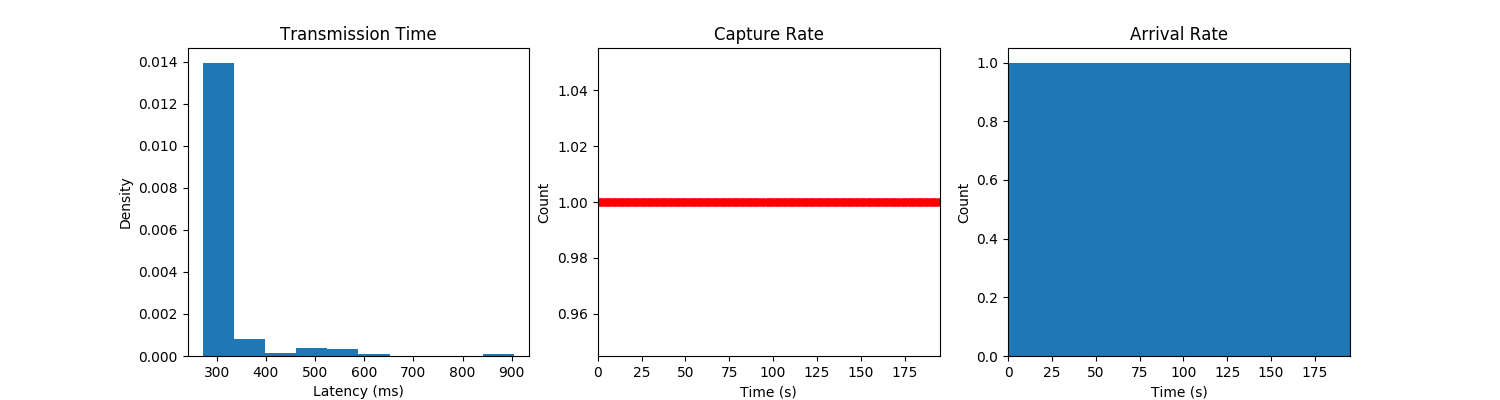

In [46]:
%matplotlib notebook

from IPython.core.debugger import set_trace
exp_name = 'ltearrival'
sess = dbutils.get_session()
print("Experiment ({}). The payload here is a simple message instead of images due to LEL b/w".format(exp_name))
tss = np.array([(item.capture, item.arrival, item.finished, item.val) for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name==exp_name).all()], dtype=float)
plot_h_index = 1

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, plot_h_index)
data = (tss[:, 1] - tss[:, 0]).flatten() * 1000
plt.hist(data, density=True)
plt.ylabel('Density');
plt.xlabel('Latency (ms)');
plt.title('Transmission Time')
plot_h_index += 1

st = min(tss[:, 0])
plt.subplot(1, 3, plot_h_index)
plt.plot(tss[:, 0] - min(tss[:, 0]), [1]*len(tss[:,0]), 'ro', markersize=5);
plt.xlim(0, max(tss[:, 0]) - min(tss[:, 0]))
plt.ylabel('Count');
plt.xlabel('Time (s)');
plt.title('Capture Rate')
plot_h_index += 1

plt.subplot(1, 3, plot_h_index)
arrival_rate = (tss[:, 1] - st).astype(int)
plt.hist(arrival_rate, density=False, bins=len(set(arrival_rate)));
plt.xlim(0, max(tss[:, 0]) - min(tss[:, 0]))
plt.ylabel('Count');
plt.xlabel('Time (s)');
plt.title('Arrival Rate')
plot_h_index += 1
sess.close()

In [ ]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

from rmexp import dbutils, config
from rmexp.schema import models

sess = dbutils.get_session()

plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="host").all()]
plt.hist(latencys, density=True, bins=30);
plt.ylabel('Probability');
plt.xlabel('latency (ms)');
plt.title('LegoLatency 1 video streams at 10 FPS, 8 worker, host')

plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="host2separatesession").all()]
plt.hist(latencys, density=True, bins=30);
plt.ylabel('Probability');
plt.xlabel('latency (ms)');
plt.title('LegoLatency 1 video streams at 10 FPS, 8 worker, host')

In [ ]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

from rmexp import dbutils, config
from rmexp.schema import models

sess = dbutils.get_session()
print('cpu vs cpu-set')
plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="batchc4m1g").all()]
plt.hist(latencys, density=True, bins=30);
plt.ylabel('Probability')
plt.xlabel('latency (ms)')
plt.title('LegoLatency process from file directly, 4 core (specified by cpu), 1G memory')

plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="batchcpusetc4m1g").all()]
plt.hist(latencys, density=True, bins=30);
plt.ylabel('Probability')
plt.xlabel('latency (ms)')
plt.title('LegoLatency process from file directly, 4 core (specified by cpuset), 1G memory')

plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="test").all()]
plt.hist(latencys, density=True, bins=30);
plt.ylabel('Probability')
plt.xlabel('latency (ms)')
plt.title('LegoLatency process test exp')

<IPython.core.display.Javascript object>


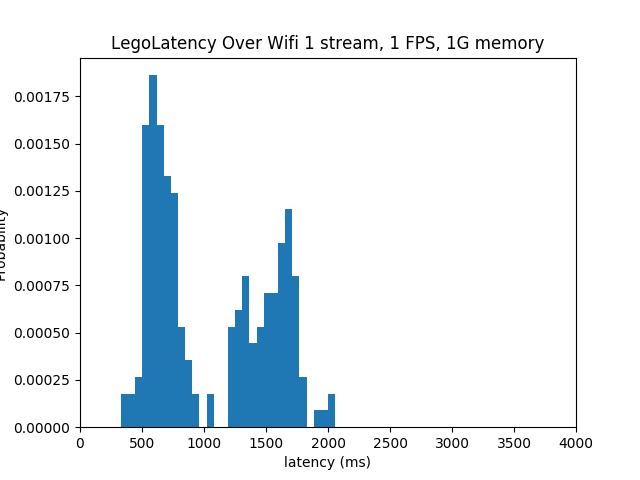

<IPython.core.display.Javascript object>


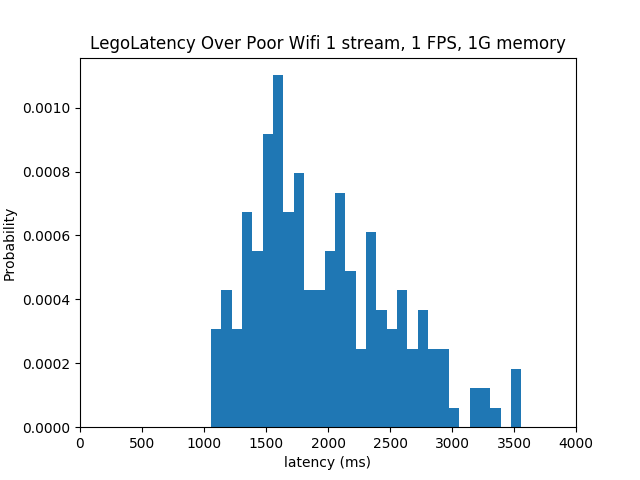

Text(0.5,1,'LegoLatency Over Poor Wifi 1 stream, 1 FPS, 1G memory')

In [6]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

from rmexp import dbutils, config
from rmexp.schema import models

sess = dbutils.get_session()
plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="pwifif1fps1w8c64m1g").all()]
plt.hist(latencys, density=True, bins=30);
plt.xlim([0, 4000])
plt.ylabel('Probability')
plt.xlabel('latency (ms)')
plt.title('LegoLatency Over Wifi 1 stream, 1 FPS, 1G memory')

plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="ppoorwifif1fps1w8c64m1g").all()]
plt.hist(latencys, density=True, bins=30);
plt.xlim([0, 4000])
plt.ylabel('Probability')
plt.xlabel('latency (ms)')
plt.title('LegoLatency Over Poor Wifi 1 stream, 1 FPS, 1G memory')


In [ ]:
dbutils.session.rollback()

In [5]:
sess = dbutils.get_session()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=='ltearrival').all()]
print(latencys)
sess.close()

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non